In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality_read.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Description


Fixed Acidity : are non-volatile acids that do not evaporate readily

Volatile Acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste

Citric Acid: acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines

Residual Sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet

Chlorides: the amount of salt in the wine

Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine

Total Sulfur Dioxide: is the amount of free + bound forms of SO2

Density: sweeter wines have a higher density

pH: describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale

Alcohol: available in small quantities in wines makes the drinkers sociable

Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

Quality: which is the output variable/predictor

# EDA( Exploratory data analysis)

In [4]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.shape

(1599, 12)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
#checking the columns of dataset
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
#checking the types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Dataset contains 12 features including target variable quality

In [10]:
#let us check the data type for feature 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
#Univariated Data Analysis
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

ALL FEATURE ARE EITHER INT OR FLOAT DATA TYPE

In [12]:
# checking for missing values

In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

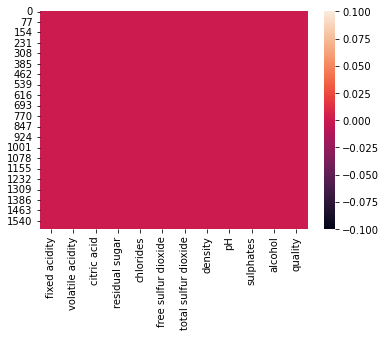

In [14]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

In [15]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [16]:
df['quality'].nunique()

6

In [17]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [18]:
#checking the uniqe value of quality column
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [19]:
df.shape[0]

1599

In [20]:
#checking the space in quality column
df.loc[df['quality']== ' ']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [21]:
df['quality']=df['quality'].replace('',np.nan)
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

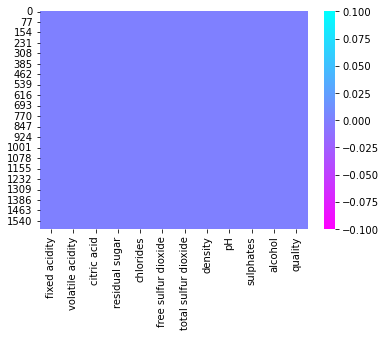

In [22]:
sns.heatmap(df.isnull(),cmap='cool_r')

In [23]:
# Data Analysis and visualization dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


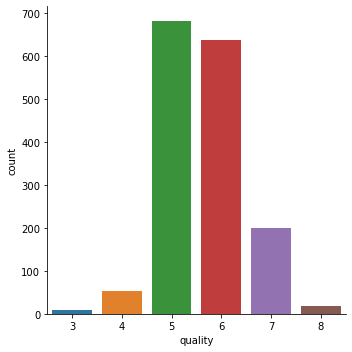

In [24]:
# number of values for each quality
sns.catplot(x='quality', data=df, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

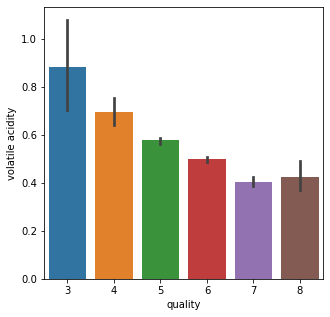

In [25]:
# volatile acidity vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'volatile acidity', data=df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

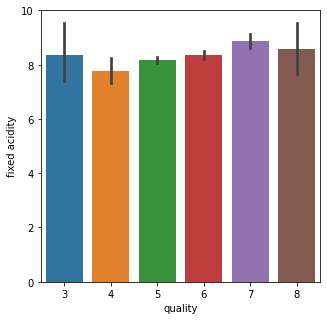

In [26]:
#fixed acidity vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'fixed acidity', data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

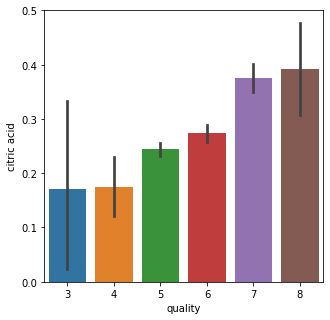

In [27]:
#citric acid vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'citric acid', data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

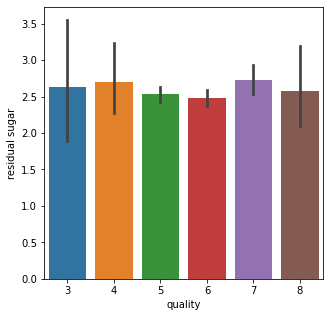

In [28]:
#residual sugar vs quaality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'residual sugar', data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

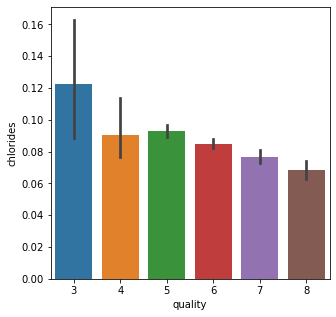

In [29]:
#chlorides vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'chlorides', data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

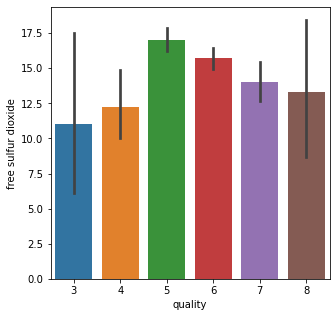

In [30]:
#free sulfur di0xide vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'free sulfur dioxide', data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

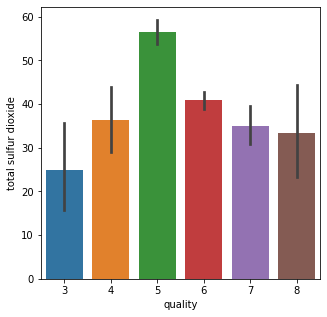

In [31]:
#total sulfur dioxide vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'total sulfur dioxide', data=df)

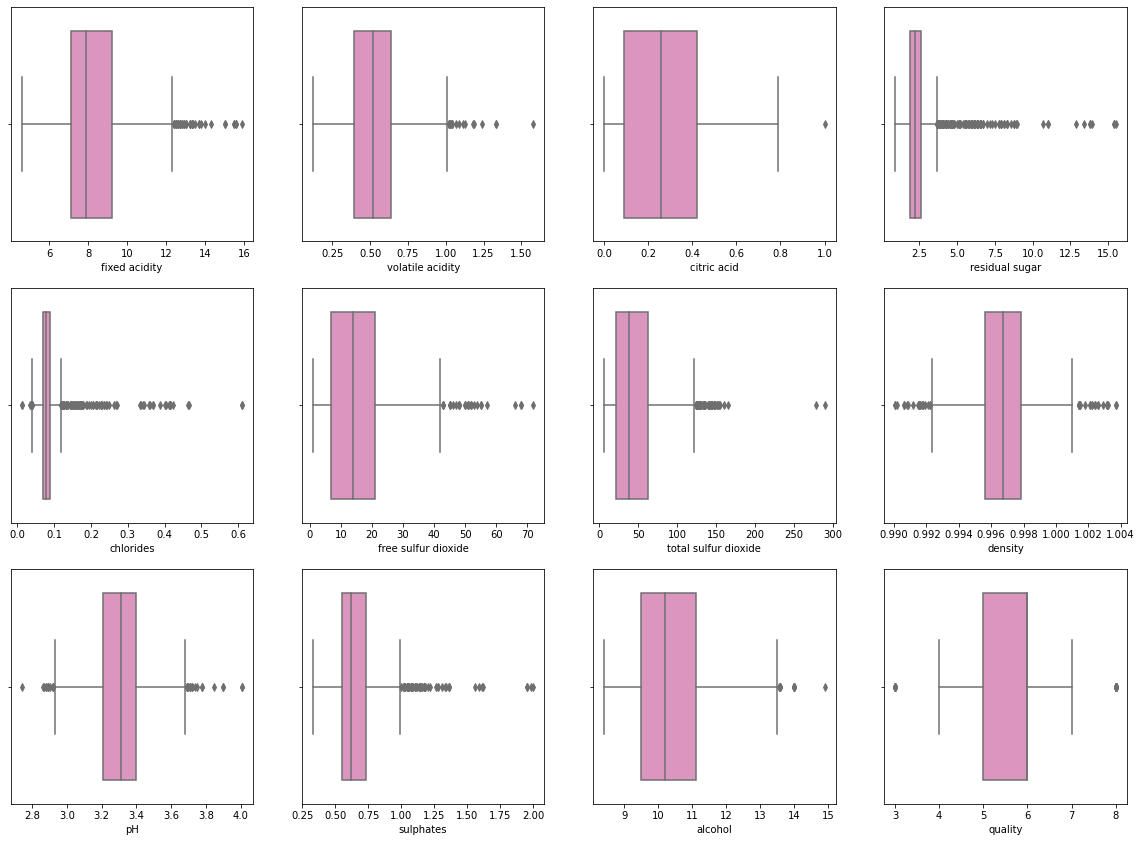

In [32]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

1.positive correlation
2.negative correlation

In [33]:
 correlation=df.corr()

# constructing a heatmap to understand the correlation between columns

<AxesSubplot:>

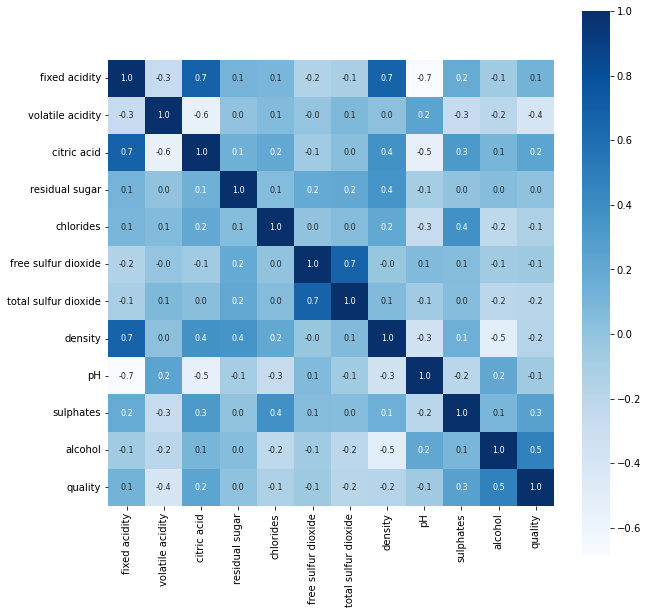

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f' , annot=True, annot_kws={'size':8}, cmap= 'Blues')

Data preprocessing

#seprate the data and label

In [35]:
x=df.drop('quality',axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

label binarization

In [36]:
y=df['quality'].apply(lambda y_value:1 if y_value>=7 else 0 )

In [37]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [38]:
def cat(x):
    if x>6.5:
        return 'good'
    else:
        return 'poor'
    


In [39]:
df['rating']=df['quality'].apply(lambda x: cat(x))


In [40]:
X=df.drop(labels=['quality','rating'],axis=1)
y=df['rating']

In [41]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
y_encode=encode.fit_transform(y)


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# checking varience inflation factor(VIF)

In [43]:
#finding varience inflation factor in each scated column 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] = [variance_inflation_factor(x.values, i)
                    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif values,Features
0,74.452265,fixed acidity
1,17.060026,volatile acidity
2,9.183495,citric acid
3,4.662992,residual sugar
4,6.554877,chlorides
5,6.442682,free sulfur dioxide
6,6.519699,total sulfur dioxide
7,1479.287209,density
8,1070.967685,pH
9,21.590621,sulphates


In [44]:
y.value_counts()

poor    1382
good     217
Name: rating, dtype: int64

# Oversampling

In [45]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [47]:
# Checking value count of target column
y.value_counts()

poor    1382
good    1382
Name: rating, dtype: int64

# Modelling

# Finding the best random state

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.9590361445783132 at random_state 143



# Creating train test split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.30, random_state = maxRS)

# Classification Alogorithms

In [50]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [51]:
# checking accuracy for RandomForestclasifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.9457831325301205
[[414  13]
 [ 32 371]]
              precision    recall  f1-score   support

        good       0.93      0.97      0.95       427
        poor       0.97      0.92      0.94       403

    accuracy                           0.95       830
   macro avg       0.95      0.95      0.95       830
weighted avg       0.95      0.95      0.95       830



# LOGISTIC REGRESSION

In [52]:
# checking  accuracy for LogisticRegression

LR=LogisticRegression()
LR.fit(x_train, y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test, predLR ))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8192771084337349
[[351  76]
 [ 74 329]]
              precision    recall  f1-score   support

        good       0.83      0.82      0.82       427
        poor       0.81      0.82      0.81       403

    accuracy                           0.82       830
   macro avg       0.82      0.82      0.82       830
weighted avg       0.82      0.82      0.82       830



# Support Vector Machine Classifier

In [53]:
# Checking accuracy for support Vector machine classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7734939759036145
[[369  58]
 [130 273]]
              precision    recall  f1-score   support

        good       0.74      0.86      0.80       427
        poor       0.82      0.68      0.74       403

    accuracy                           0.77       830
   macro avg       0.78      0.77      0.77       830
weighted avg       0.78      0.77      0.77       830



# Gradient Boosting Classifier

In [54]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9204819277108434
[[406  21]
 [ 45 358]]
              precision    recall  f1-score   support

        good       0.90      0.95      0.92       427
        poor       0.94      0.89      0.92       403

    accuracy                           0.92       830
   macro avg       0.92      0.92      0.92       830
weighted avg       0.92      0.92      0.92       830



# AdaBoost Classifier

In [55]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8783132530120482
[[381  46]
 [ 55 348]]
              precision    recall  f1-score   support

        good       0.87      0.89      0.88       427
        poor       0.88      0.86      0.87       403

    accuracy                           0.88       830
   macro avg       0.88      0.88      0.88       830
weighted avg       0.88      0.88      0.88       830



# BaggingClassifier

In [56]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9301204819277108
[[409  18]
 [ 40 363]]
              precision    recall  f1-score   support

        good       0.91      0.96      0.93       427
        poor       0.95      0.90      0.93       403

    accuracy                           0.93       830
   macro avg       0.93      0.93      0.93       830
weighted avg       0.93      0.93      0.93       830



# Extra TreeClassifier

In [57]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9602409638554217
[[419   8]
 [ 25 378]]
              precision    recall  f1-score   support

        good       0.94      0.98      0.96       427
        poor       0.98      0.94      0.96       403

    accuracy                           0.96       830
   macro avg       0.96      0.96      0.96       830
weighted avg       0.96      0.96      0.96       830



# Cross Validation Score

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
# Checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predRFC)-score.mean())

[0.94213382 0.87341772 0.93851718 0.86075949 0.90942029]
0.9048496999239983
Difference between Accracy score and cross validation score is -  0.040933432606122144


In [60]:
# Checking cv score for Random Forest Classifier
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ",accuracy_score(y_test,predLR)-score.mean())

[0.84629295 0.75045208 0.83544304 0.71971067 0.81521739]
0.7934232250963126
Difference between Accuracy score and cross validation score is-  0.025853883337422334


In [61]:
# checking cv score for Gradient Boosting Classifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ",accuracy_score(y_test,predGB)-score.mean())

[0.87341772 0.84086799 0.92947559 0.82459313 0.89130435]
0.8719317556411668
Difference between Accuracy score and cross validation score is-  0.0485501720696766


In [62]:
# Checking cv score for Support Vector machine Classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ",accuracy_score(y_test,predsvc)-score.mean())

[0.83363472 0.69620253 0.74864376 0.66003617 0.71014493]
0.729732421311948
Difference between Accuracy score and cross validation score is-  0.04376155459166642


In [63]:
# checking cv score for AdaBoosting Classifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ",accuracy_score(y_test,predABC)-score.mean())

[0.87341772 0.8119349  0.90235081 0.77757685 0.85144928]
0.8433459129386481
Difference between Accuracy score and cross validation score is-  0.03496734007340008


In [64]:
# checking cv score for Bagging classifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ",accuracy_score(y_test,predBC)-score.mean())

[0.87341772 0.8119349  0.90235081 0.77757685 0.85144928]
0.8433459129386481
Difference between Accuracy score and cross validation score is-  0.08677456898906266


In [65]:
# checking cv score for Extra Trees classifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ",accuracy_score(y_test,predET)-score.mean())

[0.87341772 0.8119349  0.90235081 0.77757685 0.85144928]
0.8433459129386481
Difference between Accuracy score and cross validation score is-  0.11689505091677355


# DecisionTreeClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.8903614457831325
[[388  39]
 [ 52 351]]
              precision    recall  f1-score   support

        good       0.88      0.91      0.90       427
        poor       0.90      0.87      0.89       403

    accuracy                           0.89       830
   macro avg       0.89      0.89      0.89       830
weighted avg       0.89      0.89      0.89       830



In [68]:
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(DT,open(file,'wb'))

# End Notes


This is one of the interesting articles that I have written because it was on today’s current top technology machine learning, but I was used basic language to explain this article so, you can’t get difficulty on understanding.

If you have any question regarding this article then your will feel free to ask in the comment section below.

# THANK YOU...(👍)